Now, let's represent how these variables correlate with one another among the monthly dataset at 1 hPa. For this, we'll use a binned analysis. First, let's load our data.

In [16]:
import xarray as xarr

filename = "CONUS_clipped_precipitation_temperature_1988.nc"
data = xarr.open_dataset(filename)
print(data["tp"].mean(dim=["longitude", "latitude"]))
print(data["t2m"].mean(dim=["longitude", "latitude"]))

<xarray.DataArray 'tp' (valid_time: 24)> Size: 96B
array([       nan, 0.00180108,        nan, 0.00143927,        nan,
       0.0020196 ,        nan, 0.00227919,        nan, 0.00207288,
              nan, 0.00148919,        nan, 0.00220487,        nan,
       0.00228612,        nan, 0.00255363,        nan, 0.0012478 ,
              nan, 0.00279829,        nan, 0.00153692], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 1988-01-01 ... 1988-12-01T06...
    number      int64 8B ...
    expver      (valid_time) <U4 384B ...
<xarray.DataArray 't2m' (valid_time: 24)> Size: 96B
array([270.5053 ,       nan, 273.6159 ,       nan, 278.73734,       nan,
       284.17526,       nan, 289.70273,       nan, 295.2073 ,       nan,
       297.2743 ,       nan, 296.43625,       nan, 291.41266,       nan,
       285.34308,       nan, 279.33322,       nan, 273.61087,       nan],
      dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 1988-01-01 ... 19

Now, we can calculate the mean across each time point across all latitudes and longitudes.

In [18]:
# calculate nationwide average across the year
temp_timeseries = data["t2m"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time').values.flatten()
clwc_timeseries = data["tp"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time').values.flatten()

print(temp_timeseries)
print(clwc_timeseries)

[270.5053  273.6159  278.73734 284.17526 289.70273 295.2073  297.2743
 296.43625 291.41266 285.34308 279.33322 273.61087]
[0.00180108 0.00143927 0.0020196  0.00227919 0.00207288 0.00148919
 0.00220487 0.00228612 0.00255363 0.0012478  0.00279829 0.00153692]


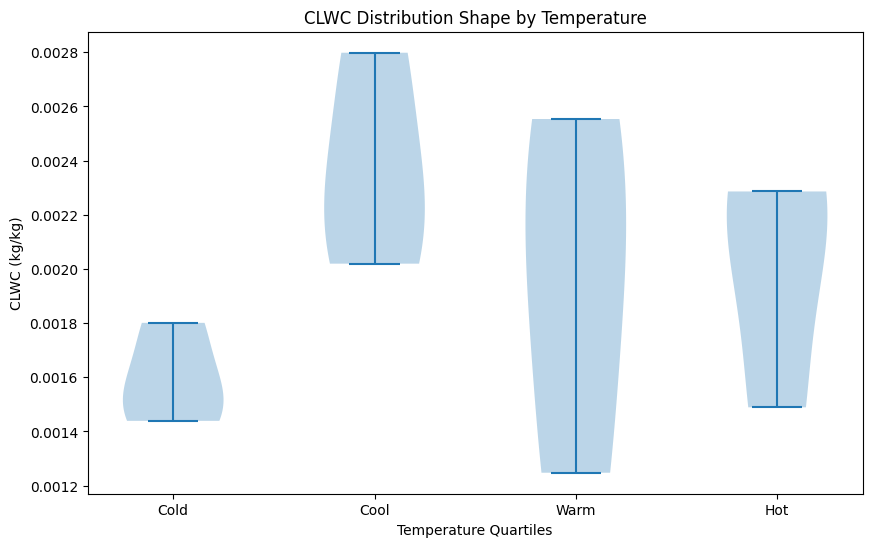

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create temperature quartiles using numpy
temp_quartiles = np.percentile(temp_timeseries, [0, 25, 50, 75, 100])

# Group CLWC values by temperature quartiles  
cold = clwc_timeseries[temp_timeseries <= temp_quartiles[1]]
cool = clwc_timeseries[(temp_timeseries > temp_quartiles[1]) & (temp_timeseries <= temp_quartiles[2])]
warm = clwc_timeseries[(temp_timeseries > temp_quartiles[2]) & (temp_timeseries <= temp_quartiles[3])]
hot = clwc_timeseries[temp_timeseries > temp_quartiles[3]]

# Plot
plt.figure(figsize=(10, 6))
plt.violinplot([cold, cool, warm, hot], positions=[1, 2, 3, 4])
plt.xticks([1, 2, 3, 4], ['Cold', 'Cool', 'Warm', 'Hot'])
plt.ylabel('CLWC (kg/kg)')
plt.xlabel('Temperature Quartiles')
plt.title('CLWC Distribution Shape by Temperature')
plt.show()